In [1]:
import pandas as pd
import numpy as np


In [2]:
admissions=pd.read_csv('readmission/admissions_202208161605.csv')
cptevents=pd.read_csv('readmission/cptevents_202208161605.csv')
d_labitems=pd.read_csv('readmission/d_labitems_202208161605.csv')
diagnoses_icd=pd.read_csv('readmission/diagnoses_icd_202208161605.csv')
drgcodes=pd.read_csv('readmission/drgcodes_202208161605.csv')
labevents=pd.read_csv('readmission/labevents_202208161605.csv')
patients=pd.read_csv('readmission/patients_202208161605.csv')
procedures_icd=pd.read_csv('readmission/procedures_icd_202208161605.csv')

C:\Users\asus\AppData\Local\Temp\ipykernel_27680\198207405.py:2: DtypeWarning: Columns (4,5,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  cptevents=pd.read_csv('readmission/cptevents_202208161605.csv')


In [3]:
heart_failure_icd9 = [
    '39891','40201','40211','40291','40401','40403','40411','40413',
    '40491','40493','4280','4281','42820','42821','42822','42823',
    '42830','42831','42832','42833','42840','42841','42842','42843','4289'
]

In [4]:
hf_diagnoses = diagnoses_icd[diagnoses_icd['icd9_code'].isin(heart_failure_icd9)]


In [5]:
hf_admissions = pd.merge(hf_diagnoses, admissions, on='hadm_id', how='inner')


In [6]:
hf_admissions.head()

,row_id_x,subject_id_x,hadm_id,seq_num,icd9_code,row_id_y,subject_id_y,admittime,dischtime,deathtime,...,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,1511,115,114585,10.0,4280,157,115,2194-10-16 12:48:00.000,2194-11-13 16:50:00.000,NaN,...,Medicare,NaN,UNOBTAINABLE,SINGLE,WHITE,NaN,NaN,ADRENAL INSUFFICIENCY,0,1
1,1527,117,140784,5.0,4280,159,117,2133-04-07 16:29:00.000,2133-04-12 16:39:00.000,NaN,...,Medicaid,NaN,CATHOLIC,SINGLE,WHITE,NaN,NaN,LIVER FAILURE;S/P TIPS,0,1
2,1610,124,138376,12.0,42833,169,124,2165-12-31 18:55:00.000,2166-02-01 06:55:00.000,2166-02-01 06:55:00.000,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1
3,1613,124,138376,15.0,4280,169,124,2165-12-31 18:55:00.000,2166-02-01 06:55:00.000,2166-02-01 06:55:00.000,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1
4,1671,130,198214,2.0,4280,175,130,2119-10-29 14:49:00.000,2119-11-05 17:00:00.000,NaN,...,Private,NaN,CATHOLIC,SINGLE,WHITE,2119-10-29 12:02:00.000,2119-10-29 17:00:00.000,RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,0,1


In [7]:
print(len(hf_admissions['subject_id_x'].unique()))

10436


In [8]:
hf_admissions = hf_admissions.drop(['row_id_x', 'subject_id_x', 'row_id_y','ethnicity','marital_status','religion','language'], axis=1)


In [9]:
hf_admissions = hf_admissions.rename(columns={'subject_id_y': 'subject_id'})


In [10]:
hf_admissions.head()

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,114585,10.0,4280,115,2194-10-16 12:48:00.000,2194-11-13 16:50:00.000,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,NaN,NaN,ADRENAL INSUFFICIENCY,0,1
1,140784,5.0,4280,117,2133-04-07 16:29:00.000,2133-04-12 16:39:00.000,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicaid,NaN,NaN,LIVER FAILURE;S/P TIPS,0,1
2,138376,12.0,42833,124,2165-12-31 18:55:00.000,2166-02-01 06:55:00.000,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1
3,138376,15.0,4280,124,2165-12-31 18:55:00.000,2166-02-01 06:55:00.000,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1
4,198214,2.0,4280,130,2119-10-29 14:49:00.000,2119-11-05 17:00:00.000,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,2119-10-29 12:02:00.000,2119-10-29 17:00:00.000,RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,0,1


In [11]:

hf_admissions['admittime'] = pd.to_datetime(hf_admissions['admittime'])
hf_admissions['dischtime'] = pd.to_datetime(hf_admissions['dischtime'])
hf_admissions['next_admit'] = hf_admissions.groupby('subject_id')['admittime'].shift(-1)
hf_admissions['days_to_readmit'] = (hf_admissions['next_admit'] - hf_admissions['dischtime']).dt.days
hf_admissions.loc[hf_admissions['days_to_readmit'] <= 0, 'days_to_readmit'] = pd.NA
hf_admissions['readmitted_30'] = hf_admissions['days_to_readmit'].apply(lambda x: 1 if pd.notna(x) and x <= 30 else 0)


In [12]:
hf_admissions

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30
0,114585,10.0,4280,115,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,NaN,NaN,ADRENAL INSUFFICIENCY,0,1,NaT,NaN,0
1,140784,5.0,4280,117,2133-04-07 16:29:00,2133-04-12 16:39:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicaid,NaN,NaN,LIVER FAILURE;S/P TIPS,0,1,NaT,NaN,0
2,138376,12.0,42833,124,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,2165-12-31 18:55:00,NaN,0
3,138376,15.0,4280,124,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,NaT,NaN,0
4,198214,2.0,4280,130,2119-10-29 14:49:00,2119-11-05 17:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,2119-10-29 12:02:00.000,2119-10-29 17:00:00.000,RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,0,1,NaT,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21269,109999,15.0,4280,97144,2187-02-07 14:00:00,2187-02-27 13:15:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,REHAB/DISTINCT PART HOSP,Medicare,NaN,NaN,AORTIC STENOSIS\Transcatheter Aortic Valve Imp...,0,1,NaT,NaN,0
21270,133092,5.0,42833,97172,2174-09-07 18:40:00,2174-09-14 19:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOSPICE-HOME,Medicare,2174-09-07 15:06:00.000,2174-09-07 20:21:00.000,LOWER GI BLEED,0,1,2174-09-07 18:40:00,NaN,0
21271,133092,9.0,4280,97172,2174-09-07 18:40:00,2174-09-14 19:58:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOSPICE-HOME,Medicare,2174-09-07 15:06:00.000,2174-09-07 20:21:00.000,LOWER GI BLEED,0,1,NaT,NaN,0
21272,152542,7.0,4280,97488,2128-04-08 20:58:00,2128-04-13 16:27:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME HEALTH CARE,Medicare,2128-04-08 19:57:00.000,2128-04-08 21:15:00.000,PERIRECTAL ABSCESS,0,1,2128-08-27 15:01:00,135.0,0


In [13]:
hf_admissions['days_to_readmit'].unique()

array([      nan, 1.678e+03, 1.860e+03, 4.380e+02, 7.100e+01, 5.250e+02,
       1.569e+03, 3.780e+02, 7.760e+02, 2.030e+02, 2.869e+03, 5.300e+01,
       3.540e+02, 6.160e+02, 1.700e+01, 5.900e+01, 1.228e+03, 9.600e+01,
       4.600e+01, 6.060e+02, 2.890e+02, 4.200e+01, 3.920e+02, 1.127e+03,
       1.151e+03, 9.200e+01, 7.000e+00, 1.220e+02, 1.400e+01, 1.600e+02,
       1.720e+02, 5.500e+01, 1.833e+03, 5.310e+02, 2.380e+02, 2.432e+03,
       3.500e+01, 5.000e+00, 2.500e+01, 1.054e+03, 1.248e+03, 3.000e+00,
       7.140e+02, 4.700e+02, 4.260e+02, 1.960e+02, 8.670e+02, 4.000e+00,
       1.570e+03, 1.920e+02, 5.700e+02, 4.500e+01, 2.554e+03, 2.000e+00,
       1.800e+01, 9.100e+01, 6.390e+02, 1.577e+03, 6.000e+00, 1.777e+03,
       7.200e+01, 1.650e+02, 7.720e+02, 9.000e+00, 1.045e+03, 2.260e+02,
       3.690e+02, 6.880e+02, 7.600e+01, 1.670e+02, 2.203e+03, 7.870e+02,
       2.090e+02, 1.114e+03, 3.590e+02, 5.060e+02, 1.070e+02, 1.619e+03,
       3.000e+01, 3.630e+02, 1.339e+03, 1.200e+01, 

In [95]:
drg_agg = drgcodes.groupby('hadm_id').agg({
    'drg_code': lambda x: ','.join(x.dropna().astype(str)),
    'description': lambda x: '; '.join(x.dropna().unique())
}).reset_index()


In [96]:
merged_df= hf_admissions.merge(drg_agg, on='hadm_id', how='left')


In [97]:
merged_df.shape

(21274, 21)

In [98]:
patients.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,234,249,F,2075-03-13 00:00:00.000,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00.000,2188-11-22 00:00:00.000,2188-11-22 00:00:00.000,NaN,1
2,236,251,M,2090-03-15 00:00:00.000,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00.000,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00.000,NaN,NaN,NaN,0


In [99]:
patients_new = patients[['subject_id', 'gender','expire_flag']]


In [100]:
patients_new.head()

,subject_id,gender,expire_flag
0,249,F,0
1,250,F,1
2,251,M,0
3,252,M,0
4,253,F,0


In [101]:
labevents_new=labevents[['subject_id','itemid','charttime','value','valuenum','valueuom','flag']]

In [102]:
labevents_new.head()

,subject_id,itemid,charttime,value,valuenum,valueuom,flag
0,3,50820,2101-10-12 16:07:00.000,7.39,7.39,units,NaN
1,3,50800,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN
2,3,50802,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN
3,3,50804,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN
4,3,50808,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal


In [103]:
labevents_new.shape

(27854055, 7)

In [104]:
hf_diagnoses.head()

,row_id,subject_id,hadm_id,seq_num,icd9_code
51,1511,115,114585,10.0,4280
67,1527,117,140784,5.0,4280
150,1610,124,138376,12.0,42833
153,1613,124,138376,15.0,4280
211,1671,130,198214,2.0,4280


In [105]:
labevents.shape

(27854055, 9)

In [106]:
print(len(hf_diagnoses['subject_id'].unique()))

10436


In [107]:
admissions.shape

(58976, 19)

In [108]:
hf_diagnoses_1 = hf_diagnoses.drop(['row_id','seq_num'],axis=1)

In [109]:
hf_diagnoses_1.head()

,subject_id,hadm_id,icd9_code
51,115,114585,4280
67,117,140784,4280
150,124,138376,42833
153,124,138376,4280
211,130,198214,4280


In [110]:
lab_events_filtered = labevents_new[labevents_new['subject_id'].isin(hf_diagnoses_1['subject_id'])]


In [111]:
lab_events_filtered.shape

(10778204, 7)

In [112]:
lab_events_filtered.head()

,subject_id,itemid,charttime,value,valuenum,valueuom,flag
0,3,50820,2101-10-12 16:07:00.000,7.39,7.39,units,NaN
1,3,50800,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN
2,3,50802,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN
3,3,50804,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN
4,3,50808,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal


In [113]:
d_labitems.head()

,row_id,itemid,label,fluid,category,loinc_code
0,546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
1,547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5
2,548,51348,"Hematocrit, CSF",Cerebrospinal Fluid (CSF),Hematology,30398-2
3,549,51349,Hypersegmented Neutrophils,Cerebrospinal Fluid (CSF),Hematology,26506-6
4,550,51350,Immunophenotyping,Cerebrospinal Fluid (CSF),Hematology,NaN


In [114]:
lab_events_filtered= pd.merge(lab_events_filtered, d_labitems, on='itemid', how='left')

In [116]:
lab_events_filtered.head()

,subject_id,itemid,charttime,value,valuenum,valueuom,flag,row_id,label,fluid,category,loinc_code
0,3,50820,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,21,pH,Blood,Blood Gas,11558-4
1,3,50800,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,1,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN
2,3,50802,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,3,Base Excess,Blood,Blood Gas,11555-0
3,3,50804,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,5,Calculated Total CO2,Blood,Blood Gas,34728-6
4,3,50808,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,9,Free Calcium,Blood,Blood Gas,1994-3


In [117]:
lab_events_filtered=lab_events_filtered.drop(['row_id'],axis=1)

In [118]:
lab_events_filtered.head()

,subject_id,itemid,charttime,value,valuenum,valueuom,flag,label,fluid,category,loinc_code
0,3,50820,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,pH,Blood,Blood Gas,11558-4
1,3,50800,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN
2,3,50802,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,Base Excess,Blood,Blood Gas,11555-0
3,3,50804,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,Calculated Total CO2,Blood,Blood Gas,34728-6
4,3,50808,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,Free Calcium,Blood,Blood Gas,1994-3


In [119]:
lab_events_filtered=pd.merge(lab_events_filtered, patients_new, on='subject_id', how='left')

In [120]:
lab_events_filtered.head()

,subject_id,itemid,charttime,value,valuenum,valueuom,flag,label,fluid,category,loinc_code,gender,expire_flag
0,3,50820,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,pH,Blood,Blood Gas,11558-4,M,1
1,3,50800,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN,M,1
2,3,50802,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,Base Excess,Blood,Blood Gas,11555-0,M,1
3,3,50804,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,Calculated Total CO2,Blood,Blood Gas,34728-6,M,1
4,3,50808,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,Free Calcium,Blood,Blood Gas,1994-3,M,1


In [121]:
lab_events_filtered.shape

(10778204, 13)

In [122]:
merged_df.head(1)

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30,drg_code,description
0,114585,10.0,4280,115,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,...,NaN,NaN,ADRENAL INSUFFICIENCY,0,1,NaT,NaN,0,"4014,286",Pituitary & Adrenal Procedures; ADRENAL & PITU...


In [123]:
merged_df.head(1)

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30,drg_code,description
0,114585,10.0,4280,115,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,...,NaN,NaN,ADRENAL INSUFFICIENCY,0,1,NaT,NaN,0,"4014,286",Pituitary & Adrenal Procedures; ADRENAL & PITU...


In [124]:
lab_events_filtered=lab_events_filtered.drop(['itemid'],axis=1)

In [125]:
lab_events_filtered.head()

,subject_id,charttime,value,valuenum,valueuom,flag,label,fluid,category,loinc_code,gender,expire_flag
0,3,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,pH,Blood,Blood Gas,11558-4,M,1
1,3,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN,M,1
2,3,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,Base Excess,Blood,Blood Gas,11555-0,M,1
3,3,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,Calculated Total CO2,Blood,Blood Gas,34728-6,M,1
4,3,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,Free Calcium,Blood,Blood Gas,1994-3,M,1


In [126]:
lab_events_filtered.head()

,subject_id,charttime,value,valuenum,valueuom,flag,label,fluid,category,loinc_code,gender,expire_flag
0,3,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,pH,Blood,Blood Gas,11558-4,M,1
1,3,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN,M,1
2,3,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,Base Excess,Blood,Blood Gas,11555-0,M,1
3,3,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,Calculated Total CO2,Blood,Blood Gas,34728-6,M,1
4,3,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,Free Calcium,Blood,Blood Gas,1994-3,M,1


In [127]:
merged_df.head()

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30,drg_code,description
0,114585,10.0,4280,115,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,...,NaN,NaN,ADRENAL INSUFFICIENCY,0,1,NaT,NaN,0,"4014,286",Pituitary & Adrenal Procedures; ADRENAL & PITU...
1,140784,5.0,4280,117,2133-04-07 16:29:00,2133-04-12 16:39:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,...,NaN,NaN,LIVER FAILURE;S/P TIPS,0,1,NaT,NaN,0,191,"PANCREAS, LIVER & SHUNT PROCEDURES WITH COMPLI..."
2,138376,12.0,42833,124,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,2165-12-31 18:55:00,NaN,0,"2214,2214,3",Major Small & Large Bowel Procedures; ECMO OR ...
3,138376,15.0,4280,124,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,NaT,NaN,0,"2214,2214,3",Major Small & Large Bowel Procedures; ECMO OR ...
4,198214,2.0,4280,130,2119-10-29 14:49:00,2119-11-05 17:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,2119-10-29 12:02:00.000,2119-10-29 17:00:00.000,RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,0,1,NaT,NaN,0,107,CORONARY BYPASS WITH CARDIAC CATHETER


In [128]:
print(len(merged_df['hadm_id'].unique()))

14040


In [129]:
merged_df[merged_df.duplicated(subset='hadm_id', keep=False)].sort_values('hadm_id').head(10)


,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30,drg_code,description
15424,100018,14.0,4280,58128,2176-08-29 10:30:00,2176-09-06 17:13:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,LONG TERM CARE HOSPITAL,...,NaN,NaN,HERNIATED DISC/SDA,0,1,2177-05-28 21:20:00,264.0,0,"234,234,28",Spinal Procedures; SPINAL PROCEDURES W MCC
15423,100018,4.0,42833,58128,2176-08-29 10:30:00,2176-09-06 17:13:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,LONG TERM CARE HOSPITAL,...,NaN,NaN,HERNIATED DISC/SDA,0,1,2176-08-29 10:30:00,NaN,0,"234,234,28",Spinal Procedures; SPINAL PROCEDURES W MCC
14652,100035,26.0,4280,48539,2115-02-22 06:51:00,2115-03-19 14:37:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,REHAB/DISTINCT PART HOSP,...,2115-02-22 06:24:00.000,2115-02-22 09:14:00.000,POST ARREST,0,1,NaT,NaN,0,"1214,1214,166",Other Respiratory & Chest Procedures; OTHER RE...
14651,100035,11.0,42822,48539,2115-02-22 06:51:00,2115-03-19 14:37:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,REHAB/DISTINCT PART HOSP,...,2115-02-22 06:24:00.000,2115-02-22 09:14:00.000,POST ARREST,0,1,2115-02-22 06:51:00,NaN,0,"1214,1214,166",Other Respiratory & Chest Procedures; OTHER RE...
12343,100036,2.0,42833,30078,2187-07-13 13:58:00,2187-07-23 15:45:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,...,NaN,NaN,CHF,0,1,2187-07-13 13:58:00,NaN,0,"1633,1633,219",Cardiac Valve Procedures w/o Cardiac Catheteri...
12344,100036,6.0,4280,30078,2187-07-13 13:58:00,2187-07-23 15:45:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,SNF,...,NaN,NaN,CHF,0,1,NaT,NaN,0,"1633,1633,219",Cardiac Valve Procedures w/o Cardiac Catheteri...
15229,100039,16.0,4280,53014,2174-04-18 23:16:00,2174-05-17 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,...,2174-04-18 15:10:00.000,2174-04-19 00:02:00.000,ABDOMINAL PAIN,0,1,2172-10-15 19:06:00,NaN,0,"2514,2514,391","Abdominal Pain; ESOPHAGITIS, GASTROENT & MISC ..."
15228,100039,2.0,42843,53014,2174-04-18 23:16:00,2174-05-17 14:00:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,...,2174-04-18 15:10:00.000,2174-04-19 00:02:00.000,ABDOMINAL PAIN,0,1,2174-04-18 23:16:00,NaN,0,"2514,2514,391","Abdominal Pain; ESOPHAGITIS, GASTROENT & MISC ..."
4306,100061,1.0,42833,11728,2178-12-25 14:11:00,2178-12-27 11:45:00,2178-12-27 11:45:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,NaN,NaN,CONGESTIVE HEART FAILURE;COPD,1,1,2178-12-25 14:11:00,NaN,0,"1943,1943,292",Heart Failure; HEART FAILURE & SHOCK W CC
4307,100061,4.0,4280,11728,2178-12-25 14:11:00,2178-12-27 11:45:00,2178-12-27 11:45:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,NaN,NaN,CONGESTIVE HEART FAILURE;COPD,1,1,2178-09-03 23:49:00,NaN,0,"1943,1943,292",Heart Failure; HEART FAILURE & SHOCK W CC


In [130]:
merged_df.head(1)

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30,drg_code,description
0,114585,10.0,4280,115,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,...,NaN,NaN,ADRENAL INSUFFICIENCY,0,1,NaT,NaN,0,"4014,286",Pituitary & Adrenal Procedures; ADRENAL & PITU...


In [131]:
lab_events_filtered.head()

,subject_id,charttime,value,valuenum,valueuom,flag,label,fluid,category,loinc_code,gender,expire_flag
0,3,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,pH,Blood,Blood Gas,11558-4,M,1
1,3,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN,M,1
2,3,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,Base Excess,Blood,Blood Gas,11555-0,M,1
3,3,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,Calculated Total CO2,Blood,Blood Gas,34728-6,M,1
4,3,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,Free Calcium,Blood,Blood Gas,1994-3,M,1


In [132]:
print(lab_events_filtered['charttime'].isna().sum())
print(f"Total rows: {len(lab_events_filtered)}")


0
Total rows: 10778204


In [133]:
merged_df_1=merged_df

In [134]:
lab_events_filtered_1=lab_events_filtered

In [135]:
lab_events_filtered.head()

,subject_id,charttime,value,valuenum,valueuom,flag,label,fluid,category,loinc_code,gender,expire_flag
0,3,2101-10-12 16:07:00.000,7.39,7.39,units,NaN,pH,Blood,Blood Gas,11558-4,M,1
1,3,2101-10-12 18:17:00.000,ART,NaN,NaN,NaN,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN,M,1
2,3,2101-10-12 18:17:00.000,-1,-1.00,mEq/L,NaN,Base Excess,Blood,Blood Gas,11555-0,M,1
3,3,2101-10-12 18:17:00.000,22,22.00,mEq/L,NaN,Calculated Total CO2,Blood,Blood Gas,34728-6,M,1
4,3,2101-10-12 18:17:00.000,0.93,0.93,mmol/L,abnormal,Free Calcium,Blood,Blood Gas,1994-3,M,1


In [136]:
merged_df_1.head()

,hadm_id,seq_num,icd9_code,subject_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,next_admit,days_to_readmit,readmitted_30,drg_code,description
0,114585,10.0,4280,115,2194-10-16 12:48:00,2194-11-13 16:50:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,...,NaN,NaN,ADRENAL INSUFFICIENCY,0,1,NaT,NaN,0,"4014,286",Pituitary & Adrenal Procedures; ADRENAL & PITU...
1,140784,5.0,4280,117,2133-04-07 16:29:00,2133-04-12 16:39:00,NaN,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,...,NaN,NaN,LIVER FAILURE;S/P TIPS,0,1,NaT,NaN,0,191,"PANCREAS, LIVER & SHUNT PROCEDURES WITH COMPLI..."
2,138376,12.0,42833,124,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,2165-12-31 18:55:00,NaN,0,"2214,2214,3",Major Small & Large Bowel Procedures; ECMO OR ...
3,138376,15.0,4280,124,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00.000,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,NaN,NaN,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,NaT,NaN,0,"2214,2214,3",Major Small & Large Bowel Procedures; ECMO OR ...
4,198214,2.0,4280,130,2119-10-29 14:49:00,2119-11-05 17:00:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,...,2119-10-29 12:02:00.000,2119-10-29 17:00:00.000,RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,0,1,NaT,NaN,0,107,CORONARY BYPASS WITH CARDIAC CATHETER


In [137]:
lab_events_filtered = lab_events_filtered[[
    'subject_id', 'charttime', 'valuenum', 'label', 'flag'
]]

In [138]:
merged_df = merged_df[[
    'hadm_id', 'subject_id', 'admittime', 'dischtime', 
    'admission_type', 'admission_location', 'discharge_location',
    'insurance', 'diagnosis', 'hospital_expire_flag', 
    'readmitted_30', 'days_to_readmit'
]]

In [139]:
merged_df.head()

,hadm_id,subject_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,diagnosis,hospital_expire_flag,readmitted_30,days_to_readmit
0,114585,115,2194-10-16 12:48:00,2194-11-13 16:50:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,ADRENAL INSUFFICIENCY,0,0,NaN
1,140784,117,2133-04-07 16:29:00,2133-04-12 16:39:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicaid,LIVER FAILURE;S/P TIPS,0,0,NaN
2,138376,124,2165-12-31 18:55:00,2166-02-01 06:55:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,0,NaN
3,138376,124,2165-12-31 18:55:00,2166-02-01 06:55:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,0,NaN
4,198214,130,2119-10-29 14:49:00,2119-11-05 17:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Private,RULE-OUT MYOCARDIAL INFARCTION;TELEMETRY,0,0,NaN


In [140]:
print(len(merged_df))

21274


In [141]:
lab_events_filtered.head()

,subject_id,charttime,valuenum,label,flag
0,3,2101-10-12 16:07:00.000,7.39,pH,NaN
1,3,2101-10-12 18:17:00.000,NaN,SPECIMEN TYPE,NaN
2,3,2101-10-12 18:17:00.000,-1.00,Base Excess,NaN
3,3,2101-10-12 18:17:00.000,22.00,Calculated Total CO2,NaN
4,3,2101-10-12 18:17:00.000,0.93,Free Calcium,abnormal


In [142]:
lab_events_filtered['label'].unique()

array(['pH', 'SPECIMEN TYPE', 'Base Excess', 'Calculated Total CO2',
       'Free Calcium', 'Intubated', 'Lactate', 'pCO2', 'pO2',
       'Temperature', 'Anion Gap', 'Bicarbonate', 'Calcium, Total',
       'Chloride', 'Creatinine', 'Glucose', 'Magnesium', 'Phosphate',
       'Potassium', 'Sodium', 'Urea Nitrogen', 'Vancomycin', 'Hematocrit',
       'Alanine Aminotransferase (ALT)',
       'Asparate Aminotransferase (AST)', 'Creatine Kinase (CK)',
       'Anisocytosis', 'Basophils', 'Eosinophils', 'Hemoglobin',
       'Hypochromia', 'Lymphocytes', 'Macrocytes', 'MCH', 'MCHC', 'MCV',
       'Microcytes', 'Monocytes', 'Neutrophils', 'Platelet Count',
       'Poikilocytosis', 'RDW', 'Red Blood Cell Fragments',
       'Red Blood Cells', 'White Blood Cells', 'Bilirubin', 'Blood',
       'Ketone', 'Leukocytes', 'Nitrite', 'Protein', 'Specific Gravity',
       'Urine Appearance', 'Urine Color', 'Urobilinogen', 'Bacteria',
       'Epithelial Cells', 'Hyaline Casts', 'RBC', 'Urine Mucous', 'WBC'

In [143]:
hf_critical_labs = [
    'BNP', 'NTproBNP', 'Troponin', 'Creatinine', 'Sodium', 'Potassium',
    'Urea Nitrogen', 'BUN', 'Hemoglobin', 'Hematocrit', 'Albumin',
    'Glucose', 'Magnesium', 'Chloride', 'AST', 'ALT', 'Bilirubin',
    'C-Reactive Protein', 'CRP', 'D-Dimer', 'pH', 'pCO2', 'Lactate'
]
# Standardize label case for matching
hf_critical_labs_lower = [x.lower() for x in hf_critical_labs]

# Filter the rows
filtered = lab_events_filtered[
    lab_events_filtered['label'].str.lower().isin(hf_critical_labs_lower)
].copy()


In [144]:
print(len(filtered['label'].unique()))

17


In [145]:
filtered.shape

(3573750, 5)

In [146]:
filtered.head()

,subject_id,charttime,valuenum,label,flag
0,3,2101-10-12 16:07:00.000,7.39,pH,NaN
6,3,2101-10-12 18:17:00.000,1.80,Lactate,NaN
7,3,2101-10-12 18:17:00.000,33.00,pCO2,NaN
8,3,2101-10-12 18:17:00.000,7.42,pH,NaN
14,3,2101-10-13 03:00:00.000,109.00,Chloride,NaN


In [147]:
filtered['label'] = filtered['label'].str.lower()  # lowercase for consistency

lab_wide = filtered.pivot_table(
    index=['subject_id', 'charttime'],
    columns='label',
    values='valuenum',
    aggfunc='first'  # if multiple, take first (or change to mean/median as needed)
).reset_index()

print(f"Resulting dataset shape: {lab_wide.shape}")
print(lab_wide.head())

Resulting dataset shape: (678580, 18)
label  subject_id                charttime  albumin  c-reactive protein  \
0               3  2101-10-04 15:24:00.000      NaN                 NaN   
1               3  2101-10-05 06:00:00.000      2.8                 NaN   
2               3  2101-10-06 05:45:00.000      NaN                 NaN   
3               3  2101-10-07 04:30:00.000      NaN                 NaN   
4               3  2101-10-11 19:10:00.000      NaN                 NaN   

label  chloride  creatinine  d-dimer  glucose  hematocrit  hemoglobin  \
0         103.0         1.7      NaN    121.0        33.0        11.5   
1         103.0         1.6      NaN    116.0        33.4        11.0   
2         104.0         1.8      NaN     94.0        33.1        10.9   
3         101.0         1.8      NaN     92.0        32.0        10.6   
4         104.0         2.1      NaN    145.0        28.6         9.7   

label  lactate  magnesium  ntprobnp  pco2  ph  potassium  sodium  \
0   

In [148]:
flag_wide = filtered.pivot_table(
    index=['subject_id', 'charttime'],
    columns='label',
    values='flag',
    aggfunc='first'
).reset_index()

# Rename flag columns to distinguish them (e.g., add suffix '_flag')
flag_wide.columns = ['subject_id', 'charttime'] + [f"{col}_flag" for col in flag_wide.columns[2:]]

print(f"Resulting dataset shape for flags: {flag_wide.shape}")
print(flag_wide.head())

# Merge the two wide tables (on subject_id and charttime) so each row has both values and their corresponding flags.
# Ensure charttime is in datetime format in both DataFrames
lab_wide['charttime'] = pd.to_datetime(lab_wide['charttime'])
flag_wide['charttime'] = pd.to_datetime(flag_wide['charttime'])

# Now merge
final_df = lab_wide.merge(flag_wide, on=['subject_id', 'charttime'], how='left')

print(f"Final merged dataset shape: {final_df.shape}")
print(final_df.head())


Resulting dataset shape for flags: (554233, 18)
   subject_id                charttime albumin_flag c-reactive protein_flag  \
0           3  2101-10-04 15:24:00.000          NaN                     NaN   
1           3  2101-10-05 06:00:00.000     abnormal                     NaN   
2           3  2101-10-06 05:45:00.000          NaN                     NaN   
3           3  2101-10-07 04:30:00.000          NaN                     NaN   
4           3  2101-10-11 19:10:00.000          NaN                     NaN   

  chloride_flag creatinine_flag d-dimer_flag glucose_flag hematocrit_flag  \
0           NaN        abnormal          NaN     abnormal        abnormal   
1           NaN        abnormal          NaN     abnormal        abnormal   
2           NaN        abnormal          NaN          NaN        abnormal   
3           NaN        abnormal          NaN          NaN        abnormal   
4           NaN        abnormal          NaN     abnormal        abnormal   

  hemoglobin_f

In [149]:
merged_df.head(1)

,hadm_id,subject_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,diagnosis,hospital_expire_flag,readmitted_30,days_to_readmit
0,114585,115,2194-10-16 12:48:00,2194-11-13 16:50:00,EMERGENCY,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,ADRENAL INSUFFICIENCY,0,0,NaN


In [150]:
# Convert datetime columns to datetime objects
final_df['charttime'] = pd.to_datetime(final_df['charttime'])
merged_df['admittime'] = pd.to_datetime(merged_df['admittime'])
merged_df['dischtime'] = pd.to_datetime(merged_df['dischtime'])

# Merge lab results with admissions based on subject_id and lab time within admission window
merged_data = pd.merge_asof(
    final_df.sort_values('charttime'),
    merged_df.sort_values('admittime'),
    left_on='charttime',
    right_on='admittime',
    by='subject_id',
    direction='backward',
    tolerance=pd.Timedelta('30D')  # or any appropriate time window
)

# Filter merged_data where charttime is between admittime and dischtime
merged_data = merged_data[
    (merged_data['charttime'] >= merged_data['admittime']) &
    (merged_data['charttime'] <= merged_data['dischtime'])
]


C:\Users\asus\AppData\Local\Temp\ipykernel_27680\3364037063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['admittime'] = pd.to_datetime(merged_df['admittime'])
C:\Users\asus\AppData\Local\Temp\ipykernel_27680\3364037063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['dischtime'] = pd.to_datetime(merged_df['dischtime'])


In [151]:
merged_data.head()

,subject_id,charttime,albumin,c-reactive protein,chloride,creatinine,d-dimer,glucose,hematocrit,hemoglobin,...,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,diagnosis,hospital_expire_flag,readmitted_30,days_to_readmit
250,9319,2100-07-01 13:27:00,NaN,NaN,NaN,NaN,NaN,80.0,NaN,9.9,...,2100-07-01 12:00:00,2100-07-15 16:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,LEFT RENAL CA/SDA,0.0,0.0,NaN
251,9319,2100-07-01 16:15:00,NaN,NaN,100.0,1.0,NaN,114.0,29.2,9.7,...,2100-07-01 12:00:00,2100-07-15 16:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,LEFT RENAL CA/SDA,0.0,0.0,NaN
253,9319,2100-07-02 05:13:00,NaN,NaN,103.0,1.3,NaN,157.0,26.3,9.0,...,2100-07-01 12:00:00,2100-07-15 16:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,LEFT RENAL CA/SDA,0.0,0.0,NaN
260,31585,2100-07-02 22:10:00,NaN,NaN,104.0,1.1,NaN,127.0,NaN,NaN,...,2100-07-02 19:28:00,2100-07-07 18:05:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,PNEUMONIA,0.0,0.0,NaN
261,31585,2100-07-02 22:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2100-07-02 19:28:00,2100-07-07 18:05:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,PNEUMONIA,0.0,0.0,NaN


In [152]:
merged_data.shape

(441826, 45)

In [153]:
print(merged_data.columns.tolist())

['subject_id', 'charttime', 'albumin', 'c-reactive protein', 'chloride', 'creatinine', 'd-dimer', 'glucose', 'hematocrit', 'hemoglobin', 'lactate', 'magnesium', 'ntprobnp', 'pco2', 'ph', 'potassium', 'sodium', 'urea nitrogen', 'albumin_flag', 'c-reactive protein_flag', 'chloride_flag', 'creatinine_flag', 'd-dimer_flag', 'glucose_flag', 'hematocrit_flag', 'hemoglobin_flag', 'lactate_flag', 'magnesium_flag', 'ntprobnp_flag', 'pco2_flag', 'ph_flag', 'potassium_flag', 'sodium_flag', 'urea nitrogen_flag', 'hadm_id', 'admittime', 'dischtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'diagnosis', 'hospital_expire_flag', 'readmitted_30', 'days_to_readmit']


In [154]:
hf_adjusted_values = {
    'albumin': 3.5,        # Lower due to malnutrition/cachexia in advanced HF (normal: 4.0)
    'c-reactive protein': 2.0,  # Elevated due to chronic inflammation (normal: 1.0)
    'chloride': 100,       # Often lower due to diuretic use (normal: 103)
    'creatinine': 1.3,     # Higher due to renal impairment (normal: 1.0)
    'd-dimer': 0.8,        # Elevated from venous congestion (normal: 0.5)
    'glucose': 100,        # Higher due to metabolic syndrome (normal: 90)
    'hematocrit': 36,      # Lower due to hemodilution/anemia (normal: 40)
    'hemoglobin': 12,      # Anemia of chronic disease (normal: 14)
    'lactate': 1.5,        # Higher from poor perfusion (normal: 1.0)
    'magnesium': 1.8,      # Lower from diuretics (normal: 2.0)
    'ntprobnp': 300,       # Markedly elevated in HF (normal: 125)
    'pco2': 45,            # Often higher in HF with CO2 retention (normal: 40)
    'ph': 7.38,            # Slightly lower from metabolic acidosis (normal: 7.4)
    'potassium': 4.2,      # Carefully maintained in HF (normal: 4.0)
    'sodium': 135,         # Often lower from hemodilution (normal: 140)
    'urea nitrogen': 25    # Elevated from renal hypoperfusion (normal: 15)
}

In [155]:
merged_data.fillna(value=hf_adjusted_values, inplace=True)

In [156]:

merged_data.head()

,subject_id,charttime,albumin,c-reactive protein,chloride,creatinine,d-dimer,glucose,hematocrit,hemoglobin,...,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,diagnosis,hospital_expire_flag,readmitted_30,days_to_readmit
250,9319,2100-07-01 13:27:00,3.5,2.0,100.0,1.3,0.8,80.0,36.0,9.9,...,2100-07-01 12:00:00,2100-07-15 16:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,LEFT RENAL CA/SDA,0.0,0.0,NaN
251,9319,2100-07-01 16:15:00,3.5,2.0,100.0,1.0,0.8,114.0,29.2,9.7,...,2100-07-01 12:00:00,2100-07-15 16:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,LEFT RENAL CA/SDA,0.0,0.0,NaN
253,9319,2100-07-02 05:13:00,3.5,2.0,103.0,1.3,0.8,157.0,26.3,9.0,...,2100-07-01 12:00:00,2100-07-15 16:30:00,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,LEFT RENAL CA/SDA,0.0,0.0,NaN
260,31585,2100-07-02 22:10:00,3.5,2.0,104.0,1.1,0.8,127.0,36.0,12.0,...,2100-07-02 19:28:00,2100-07-07 18:05:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,PNEUMONIA,0.0,0.0,NaN
261,31585,2100-07-02 22:17:00,3.5,2.0,100.0,1.3,0.8,100.0,36.0,12.0,...,2100-07-02 19:28:00,2100-07-07 18:05:00,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,PNEUMONIA,0.0,0.0,NaN


In [157]:
print(merged_data.columns.tolist())

['subject_id', 'charttime', 'albumin', 'c-reactive protein', 'chloride', 'creatinine', 'd-dimer', 'glucose', 'hematocrit', 'hemoglobin', 'lactate', 'magnesium', 'ntprobnp', 'pco2', 'ph', 'potassium', 'sodium', 'urea nitrogen', 'albumin_flag', 'c-reactive protein_flag', 'chloride_flag', 'creatinine_flag', 'd-dimer_flag', 'glucose_flag', 'hematocrit_flag', 'hemoglobin_flag', 'lactate_flag', 'magnesium_flag', 'ntprobnp_flag', 'pco2_flag', 'ph_flag', 'potassium_flag', 'sodium_flag', 'urea nitrogen_flag', 'hadm_id', 'admittime', 'dischtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'diagnosis', 'hospital_expire_flag', 'readmitted_30', 'days_to_readmit']


In [158]:
# One-hot encode (for <10 categories)
merged_data_1 = pd.get_dummies(merged_data, columns=['admission_type', 'discharge_location'])

In [159]:
merged_data_1.head()

,subject_id,charttime,albumin,c-reactive protein,chloride,creatinine,d-dimer,glucose,hematocrit,hemoglobin,...,discharge_location_HOME WITH HOME IV PROVIDR,discharge_location_HOSPICE-HOME,discharge_location_HOSPICE-MEDICAL FACILITY,discharge_location_ICF,discharge_location_LEFT AGAINST MEDICAL ADVI,discharge_location_LONG TERM CARE HOSPITAL,discharge_location_OTHER FACILITY,discharge_location_REHAB/DISTINCT PART HOSP,discharge_location_SHORT TERM HOSPITAL,discharge_location_SNF
250,9319,2100-07-01 13:27:00,3.5,2.0,100.0,1.3,0.8,80.0,36.0,9.9,...,False,False,False,False,False,False,False,False,False,False
251,9319,2100-07-01 16:15:00,3.5,2.0,100.0,1.0,0.8,114.0,29.2,9.7,...,False,False,False,False,False,False,False,False,False,False
253,9319,2100-07-02 05:13:00,3.5,2.0,103.0,1.3,0.8,157.0,26.3,9.0,...,False,False,False,False,False,False,False,False,False,False
260,31585,2100-07-02 22:10:00,3.5,2.0,104.0,1.1,0.8,127.0,36.0,12.0,...,False,False,False,False,False,False,False,False,False,True
261,31585,2100-07-02 22:17:00,3.5,2.0,100.0,1.3,0.8,100.0,36.0,12.0,...,False,False,False,False,False,False,False,False,False,True


In [160]:
merged_data['insurance'].unique()

array(['Medicare', 'Private', 'Medicaid', 'Government', 'Self Pay'],
      dtype=object)

In [161]:
insurance_risk = {
    'Medicare': 3,
    'Medicaid': 4,
    'Private': 1,
    'Self Pay': 2,
    'Government': 2
}
merged_data_1['insurance_risk'] = merged_data_1['insurance'].map(insurance_risk)

In [162]:
merged_data_1.head()

,subject_id,charttime,albumin,c-reactive protein,chloride,creatinine,d-dimer,glucose,hematocrit,hemoglobin,...,discharge_location_HOSPICE-HOME,discharge_location_HOSPICE-MEDICAL FACILITY,discharge_location_ICF,discharge_location_LEFT AGAINST MEDICAL ADVI,discharge_location_LONG TERM CARE HOSPITAL,discharge_location_OTHER FACILITY,discharge_location_REHAB/DISTINCT PART HOSP,discharge_location_SHORT TERM HOSPITAL,discharge_location_SNF,insurance_risk
250,9319,2100-07-01 13:27:00,3.5,2.0,100.0,1.3,0.8,80.0,36.0,9.9,...,False,False,False,False,False,False,False,False,False,3
251,9319,2100-07-01 16:15:00,3.5,2.0,100.0,1.0,0.8,114.0,29.2,9.7,...,False,False,False,False,False,False,False,False,False,3
253,9319,2100-07-02 05:13:00,3.5,2.0,103.0,1.3,0.8,157.0,26.3,9.0,...,False,False,False,False,False,False,False,False,False,3
260,31585,2100-07-02 22:10:00,3.5,2.0,104.0,1.1,0.8,127.0,36.0,12.0,...,False,False,False,False,False,False,False,False,True,1
261,31585,2100-07-02 22:17:00,3.5,2.0,100.0,1.3,0.8,100.0,36.0,12.0,...,False,False,False,False,False,False,False,False,True,1


In [163]:
print(len(merged_data_1['diagnosis'].unique()))

5168


In [164]:
print(merged_data_1.columns.tolist())

['subject_id', 'charttime', 'albumin', 'c-reactive protein', 'chloride', 'creatinine', 'd-dimer', 'glucose', 'hematocrit', 'hemoglobin', 'lactate', 'magnesium', 'ntprobnp', 'pco2', 'ph', 'potassium', 'sodium', 'urea nitrogen', 'albumin_flag', 'c-reactive protein_flag', 'chloride_flag', 'creatinine_flag', 'd-dimer_flag', 'glucose_flag', 'hematocrit_flag', 'hemoglobin_flag', 'lactate_flag', 'magnesium_flag', 'ntprobnp_flag', 'pco2_flag', 'ph_flag', 'potassium_flag', 'sodium_flag', 'urea nitrogen_flag', 'hadm_id', 'admittime', 'dischtime', 'admission_location', 'insurance', 'diagnosis', 'hospital_expire_flag', 'readmitted_30', 'days_to_readmit', 'admission_type_ELECTIVE', 'admission_type_EMERGENCY', 'admission_type_NEWBORN', 'admission_type_URGENT', 'discharge_location_DEAD/EXPIRED', 'discharge_location_DISC-TRAN CANCER/CHLDRN H', 'discharge_location_DISC-TRAN TO FEDERAL HC', 'discharge_location_DISCH-TRAN TO PSYCH HOSP', 'discharge_location_HOME', 'discharge_location_HOME HEALTH CARE', '

In [165]:
merged_data_1 = merged_data_1.drop('diagnosis', axis=1)

In [166]:
merged_data_1=merged_data_1.drop(['hadm_id','subject_id','charttime','hospital_expire_flag'],axis=1)

In [167]:
print(merged_data_1.columns.tolist())

['albumin', 'c-reactive protein', 'chloride', 'creatinine', 'd-dimer', 'glucose', 'hematocrit', 'hemoglobin', 'lactate', 'magnesium', 'ntprobnp', 'pco2', 'ph', 'potassium', 'sodium', 'urea nitrogen', 'albumin_flag', 'c-reactive protein_flag', 'chloride_flag', 'creatinine_flag', 'd-dimer_flag', 'glucose_flag', 'hematocrit_flag', 'hemoglobin_flag', 'lactate_flag', 'magnesium_flag', 'ntprobnp_flag', 'pco2_flag', 'ph_flag', 'potassium_flag', 'sodium_flag', 'urea nitrogen_flag', 'admittime', 'dischtime', 'admission_location', 'insurance', 'readmitted_30', 'days_to_readmit', 'admission_type_ELECTIVE', 'admission_type_EMERGENCY', 'admission_type_NEWBORN', 'admission_type_URGENT', 'discharge_location_DEAD/EXPIRED', 'discharge_location_DISC-TRAN CANCER/CHLDRN H', 'discharge_location_DISC-TRAN TO FEDERAL HC', 'discharge_location_DISCH-TRAN TO PSYCH HOSP', 'discharge_location_HOME', 'discharge_location_HOME HEALTH CARE', 'discharge_location_HOME WITH HOME IV PROVIDR', 'discharge_location_HOSPICE-

In [168]:
flag_columns = [
    'albumin_flag', 'c-reactive protein_flag', 'creatinine_flag',
    'hematocrit_flag', 'hemoglobin_flag', 'magnesium_flag',
    'ntprobnp_flag', 'sodium_flag', 'urea nitrogen_flag','potassium_flag'
]

for col in flag_columns:
    if col in merged_data_1.columns:
        merged_data_1[col] = (
            merged_data_1[col]
            .astype(str)  
            .str.strip()  
            .replace({'abnormal': 1, 'delta': 2, 'nan': 0}) 
            .astype('int8')  
        )


C:\Users\asus\AppData\Local\Temp\ipykernel_27680\489616295.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'abnormal': 1, 'delta': 2, 'nan': 0})
C:\Users\asus\AppData\Local\Temp\ipykernel_27680\489616295.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'abnormal': 1, 'delta': 2, 'nan': 0})
C:\Users\asus\AppData\Local\Temp\ipykernel_27680\489616295.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `r

In [202]:
merged_data_1['admittime'] = pd.to_datetime(merged_data_1['admittime'])
merged_data_1['dischtime'] = pd.to_datetime(merged_data_1['dischtime'])


merged_data_1['length_of_stay'] = (merged_data_1['dischtime'] - merged_data_1['admittime']).dt.days


merged_data_1['admit_weekday'] = merged_data_1['admittime'].dt.weekday


drop_cols = [
    'days_to_readmit', 
    'discharge_location_DEAD/EXPIRED',
    'admission_type_NEWBORN'
]
merged_data_1.drop(columns=drop_cols, inplace=True, errors='ignore')


if 'diagnosis' in merged_data_1.columns:
    merged_data_1= merged_data_1[merged_data_1['diagnosis'].str.contains('heart failure', case=False, na=False)]


selected_features = [
    
    'ntprobnp', 'ntprobnp_flag', 'creatinine', 'creatinine_flag',
    'urea nitrogen', 'urea nitrogen_flag', 'sodium', 'sodium_flag',
    'potassium', 'potassium_flag', 'albumin', 'albumin_flag',
    'c-reactive protein', 'c-reactive protein_flag',
    'hemoglobin', 'hematocrit', 'hemoglobin_flag', 'hematocrit_flag',
    'magnesium', 'magnesium_flag',

   
    'admission_type_EMERGENCY', 'admission_type_URGENT',
    'discharge_location_HOME', 'discharge_location_HOME HEALTH CARE',
    'discharge_location_SNF', 'discharge_location_SHORT TERM HOSPITAL',
    'discharge_location_REHAB/DISTINCT PART HOSP', 'discharge_location_OTHER FACILITY',

    
    'insurance_risk',
    'length_of_stay', 'admit_weekday'
]

target_column = 'readmitted_30'


model_df = merged_data_1[selected_features + [target_column]].copy()

In [203]:
model_df.head()

,ntprobnp,ntprobnp_flag,creatinine,creatinine_flag,urea nitrogen,urea nitrogen_flag,sodium,sodium_flag,potassium,potassium_flag,...,discharge_location_HOME,discharge_location_HOME HEALTH CARE,discharge_location_SNF,discharge_location_SHORT TERM HOSPITAL,discharge_location_REHAB/DISTINCT PART HOSP,discharge_location_OTHER FACILITY,insurance_risk,length_of_stay,admit_weekday,readmitted_30
250,300.0,0,1.3,0,25.0,0,135.0,0,4.2,0,...,False,True,False,False,False,False,3,14,3,0.0
251,300.0,0,1.0,0,28.0,1,139.0,0,3.6,0,...,False,True,False,False,False,False,3,14,3,0.0
253,300.0,0,1.3,1,34.0,1,138.0,0,4.3,0,...,False,True,False,False,False,False,3,14,3,0.0
260,300.0,0,1.1,0,12.0,0,143.0,0,3.4,0,...,False,False,True,False,False,False,1,4,4,0.0
261,300.0,0,1.3,0,25.0,0,135.0,0,4.2,0,...,False,False,True,False,False,False,1,4,4,0.0


In [204]:
print(model_df.columns.tolist())

['ntprobnp', 'ntprobnp_flag', 'creatinine', 'creatinine_flag', 'urea nitrogen', 'urea nitrogen_flag', 'sodium', 'sodium_flag', 'potassium', 'potassium_flag', 'albumin', 'albumin_flag', 'c-reactive protein', 'c-reactive protein_flag', 'hemoglobin', 'hematocrit', 'hemoglobin_flag', 'hematocrit_flag', 'magnesium', 'magnesium_flag', 'admission_type_EMERGENCY', 'admission_type_URGENT', 'discharge_location_HOME', 'discharge_location_HOME HEALTH CARE', 'discharge_location_SNF', 'discharge_location_SHORT TERM HOSPITAL', 'discharge_location_REHAB/DISTINCT PART HOSP', 'discharge_location_OTHER FACILITY', 'insurance_risk', 'length_of_stay', 'admit_weekday', 'readmitted_30']


In [205]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt


In [206]:


X = model_df.drop(columns=['readmitted_30'])
y = model_df['readmitted_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [207]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')


param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1],
    'scale_pos_weight': [1, y_train.value_counts()[0] / y_train.value_counts()[1]]  # handle imbalance
}

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='roc_auc',  
                           cv=3,              
                           verbose=2,
                           n_jobs=-1)


grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)


best_model = grid_search.best_estimator_


Fitting 3 folds for each of 144 candidates, totalling 432 fits


c:\Users\asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:06:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 48.636287038337315, 'subsample': 1}


In [210]:
# Evaluate on test data
from sklearn.metrics import classification_report, roc_auc_score


y_prob = best_model.predict_proba(X_test)[:, 1]
threshold = 0.7
y_pred = (y_prob > threshold).astype(int)

print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     86586
         1.0       0.46      0.79      0.58      1780

    accuracy                           0.98     88366
   macro avg       0.73      0.89      0.78     88366
weighted avg       0.98      0.98      0.98     88366

AUC-ROC: 0.9812288140102053


In [211]:
import numpy as np
from sklearn.metrics import precision_recall_curve

thresholds = np.arange(0.1, 0.9, 0.05)
for thresh in thresholds:
    y_pred = (y_prob > thresh).astype(int)
    report = classification_report(y_test, y_pred, output_dict=True)
    print(f"Threshold: {thresh:.2f}, Precision: {report['1.0']['precision']:.2f}, Recall: {report['1.0']['recall']:.2f}")

Threshold: 0.10, Precision: 0.07, Recall: 0.99
Threshold: 0.15, Precision: 0.09, Recall: 0.98
Threshold: 0.20, Precision: 0.11, Recall: 0.98
Threshold: 0.25, Precision: 0.14, Recall: 0.97
Threshold: 0.30, Precision: 0.16, Recall: 0.96
Threshold: 0.35, Precision: 0.18, Recall: 0.95
Threshold: 0.40, Precision: 0.21, Recall: 0.93
Threshold: 0.45, Precision: 0.24, Recall: 0.92
Threshold: 0.50, Precision: 0.27, Recall: 0.90
Threshold: 0.55, Precision: 0.31, Recall: 0.88
Threshold: 0.60, Precision: 0.38, Recall: 0.85
Threshold: 0.65, Precision: 0.42, Recall: 0.82
Threshold: 0.70, Precision: 0.46, Recall: 0.79
Threshold: 0.75, Precision: 0.51, Recall: 0.75
Threshold: 0.80, Precision: 0.56, Recall: 0.70
Threshold: 0.85, Precision: 0.65, Recall: 0.65


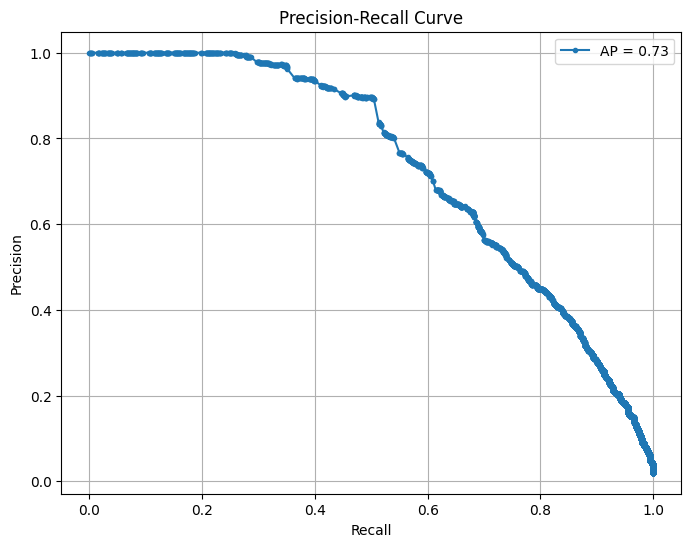

In [212]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming y_test are the true labels and y_prob are the predicted probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     86586
         1.0       0.65      0.65      0.65      1780

    accuracy                           0.99     88366
   macro avg       0.82      0.82      0.82     88366
weighted avg       0.99      0.99      0.99     88366


AUC-ROC: 0.981

Top 10 Features:
                                        feature  importance
26  discharge_location_REHAB/DISTINCT PART HOSP    0.158526
21                        admission_type_URGENT    0.094162
29                               length_of_stay    0.081553
28                               insurance_risk    0.067794
20                     admission_type_EMERGENCY    0.064468
30                                admit_weekday    0.061527
24                       discharge_location_SNF    0.059576
23          discharge_location_HOME HEALTH CARE    0.048947
25       discharge_location_SHORT TERM HOSPITAL    0.044456
22              

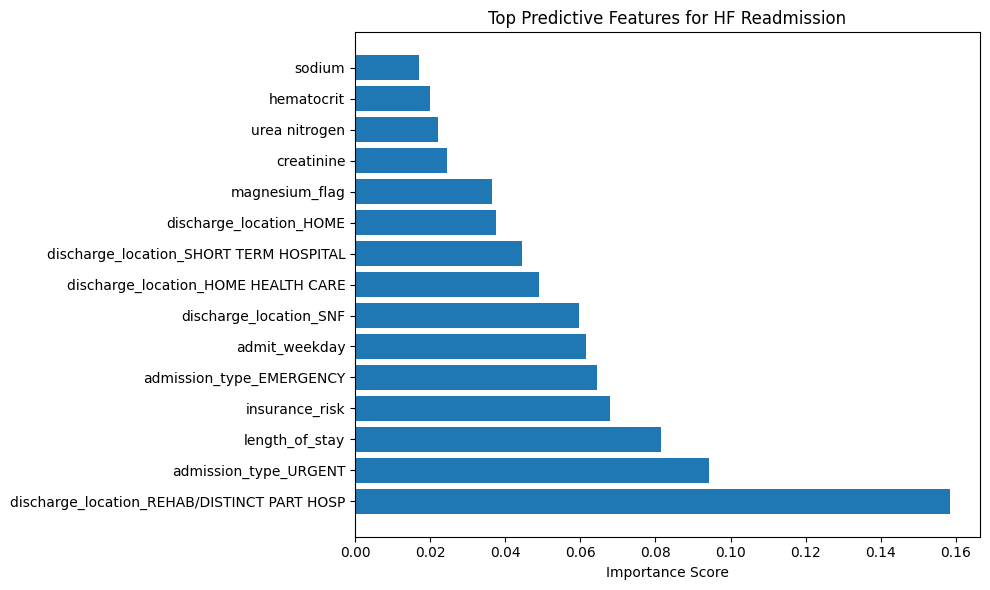

In [213]:
# =============================================
# 5. Evaluation
# =============================================


# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAUC-ROC: {roc_auc_score(y_test, y_prob):.3f}")

# Feature Importance
feat_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Features:")
print(feat_importance.head(10))

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_importance['feature'].head(15), feat_importance['importance'].head(15))
plt.title('Top Predictive Features for HF Readmission')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


In [214]:
import joblib

# Save
joblib.dump(best_model, "xgb_heart_readmission_model.pkl")

# Load
model = joblib.load("xgb_heart_readmission_model.pkl")


In [221]:
rows_with_readmit = model_df[model_df['readmitted_30'] == 1]

print(rows_with_readmit.iloc[0])


ntprobnp                                       300.0
ntprobnp_flag                                      0
creatinine                                       1.3
creatinine_flag                                    0
urea nitrogen                                   25.0
urea nitrogen_flag                                 0
sodium                                         135.0
sodium_flag                                        0
potassium                                        3.7
potassium_flag                                     0
albumin                                          3.5
albumin_flag                                       0
c-reactive protein                               2.0
c-reactive protein_flag                            0
hemoglobin                                      12.0
hematocrit                                      36.0
hemoglobin_flag                                    0
hematocrit_flag                                    0
magnesium                                     